In [43]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [44]:
data = yf.download('ZTS', start='2015-01-01', end='2019-12-31',interval="1mo")

[*********************100%%**********************]  1 of 1 completed


In [45]:
print(data.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-01  43.459999  44.869999  42.290001  42.730000  40.133102  57971400
2015-02-01  43.029999  47.400002  42.369999  46.090000  43.370312  82007700
2015-03-01  46.090000  47.919998  45.480000  46.290001  43.558502  67841400
2015-04-01  46.299999  47.990002  44.310001  44.419998  41.798847  60055100
2015-05-01  44.730000  49.959999  44.389999  49.770000  46.917187  74675100


In [46]:
data['Monthly_Return'] = data['Adj Close'].pct_change()

In [47]:
annualized_return = data['Monthly_Return'].mean() * 12

In [48]:
annualized_volatility = data['Monthly_Return'].std() * np.sqrt(12)

In [49]:
print(f'Annualized Return: {annualized_return * 100:.2f}%')
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%')

Annualized Return: 25.66%
Annualized Volatility: 18.82%


In [50]:
pip install yesg

Note: you may need to restart the kernel to use updated packages.


In [51]:
import yesg

In [52]:
ESG = yesg.get_historic_esg('ZTS')
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,47.00,54.00,37.00,57.00
2014-10-01,47.00,55.00,37.00,57.00
2014-11-01,47.00,54.00,37.00,57.00
2014-12-01,47.00,54.00,37.00,57.00
2015-01-01,66.00,57.00,72.00,67.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,18.18,1.38,7.70,9.10
2022-06-01,NaN,NaN,NaN,NaN


In [53]:
ESG.new = pd.DataFrame.dropna(ESG)
ESG.new = ESG.new['Total-Score']
ESG.new = ESG.new['2015-01-01':'2019-12-31']
ESG.new

/var/folders/xg/sx9bp7zd1t987x6ch0h3jqg80000gn/T/ipykernel_75980/179703656.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ESG.new = pd.DataFrame.dropna(ESG)


Date
2015-01-01    66.00
2015-02-01    66.00
2015-03-01    61.00
2015-04-01    61.00
2015-05-01    61.00
2015-06-01    61.00
2015-07-01    61.00
2015-08-01    61.00
2015-09-01    60.00
2015-10-01    56.00
2015-11-01    56.00
2015-12-01    56.00
2016-01-01    56.26
2016-02-01    56.12
2016-03-01    56.12
2016-04-01    53.84
2016-05-01    53.84
2016-06-01    53.84
2016-07-01    53.84
2016-08-01    53.84
2016-09-01    53.84
2016-10-01    53.84
2016-11-01    53.84
2016-12-01    53.84
2017-01-01    50.90
2017-02-01    50.90
2017-03-01    50.90
2017-04-01    50.90
2017-05-01    50.90
2017-06-01    50.90
2017-07-01    50.90
2017-08-01    50.86
2017-09-01    50.86
2017-10-01    50.56
2017-11-01    50.56
2017-12-01    50.56
2018-01-01    50.56
2018-02-01    50.56
2018-03-01    50.56
2018-04-01    51.09
2018-05-01    51.09
2018-06-01    51.09
2018-07-01    51.09
2018-08-01    51.09
2018-09-01    51.09
2018-10-01    51.09
2018-11-01    50.79
2018-12-01    50.79
2019-01-01    50.79
2019-02-01    5

Text(0.5, 1.0, 'ESG (Total Score)for Zoetis Inc.')

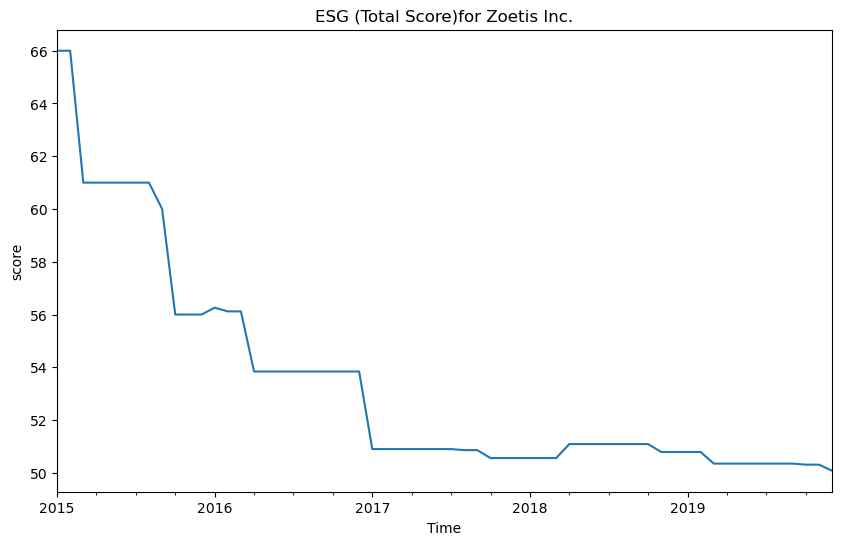

In [54]:
ESG.new.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('score')
plt.title('ESG (Total Score)for Zoetis Inc.')


In [55]:
data['LogRet'] = np.log(data['Close'] / data['Close'].shift(1))

# Calculate logarithmic returns for the ESG Total Score
ESG['LogRet'] = np.log(ESG['Total-Score'] / ESG['Total-Score'].shift(1))

# Align the datasets and calculate the correlation
merged_data = pd.merge(data[['LogRet']], ESG[['LogRet']], left_index=True, right_index=True, how='inner')
correlation = merged_data['LogRet_x'].corr(merged_data['LogRet_y'])

# Print the correlation
print(f"The correlation between the log returns of the stock price and ESG Total Score is {correlation:.4f}")

The correlation between the log returns of the stock price and ESG Total Score is -0.0439
